# GeneticAlgorithm Shortest Flight Path

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
import  time

In [ ]:
start_time = time.time()

number = 6
first = 0
last = 5



def createRoute(coordX, coordY, coordZ):
    x = np.linspace(first, last, num=number)
    y = np.linspace(first, last, num=number)
    z = np.linspace(first, last, num=number)
    X = np.random.choice(x, size=len(coordX), replace=True, p=None)
    Y = np.random.choice(y, size=len(coordY), replace=True, p=None)
    Z = np.random.choice(z, size=len(coordZ), replace=True, p=None)
    # START POINT
    X = np.linspace(first, last, num=number)
    Y[first] = first
    Z[first] = last
    Z[last] = last   
    X[first] = first
    Y[last] = last
    Y = np.linspace(first, last, num=number)
    Z = np.linspace(last, last, num=number)
    return (X,Y,Z)

def initialPopulation(popSize, coordX, coordY, coordZ, warm_start=True):
    if (warm_start==True):
        print("loading the output.npy file ")
        population_arr = np.load('outfile.npy')
    else:
        population = []
        for i in range(0, popSize):
            population.append(createRoute(coordX, coordY, coordZ))
            population_arr = np.asarray(population)
    return population_arr

# calculate distance between points in a grid
def distanceCalculate(arrays):
    distance = []
    for num in range (0, len(arrays)):
        distance = np.append(distance, np.sum(np.sqrt(np.sum((
            np.diff(arrays[num][0])**2, 
            np.diff(arrays[num][1])**2, 
            np.diff(arrays[num][2])**2), axis=0))))
    distance = distance + weatherCalculate(arrays)
    return distance

# def weatherCalculate(arrays):
#     weather = []
#     for num in range (0, len(arrays)):
#         weather = np.append(weather, np.sum(np.sqrt(np.sum((
#             np.diff(arrays[num][0])**2, 
#             np.diff(arrays[num][1])**2, 
#             np.diff(arrays[num][2])**2), axis=0))))
#     return weather

def weatherSituation():
    weather = np.zeros((len(x),len(y)), dtype=int)
#     weather[2][2] = 10
#     weather[2][3] = 10
#     weather[2][4] = 10
#     weather[2][5] = 10
#     weather[3][2] = 10
#     weather[3][3] = 10
#     weather[3][4] = 10
#     weather[3][5] = 10
#     weather[4][2] = 10
#     weather[4][3] = 10
#     weather[4][4] = 10
#     weather[4][5] = 10
#     weather[5][2] = 10
#     weather[5][3] = 10
#     weather[5][4] = 10
#     weather[5][5] = 10
    return weather

def weatherCalculate(arrays):
    #define the weather situation (later replace with function input)
    #weather = weatherSituation()
    weather = weatherSituation()
    weather_score = []
    for num in range (0, len(arrays)):
        weather2 = []
        for id in range(0,(len(arrays[0][0]))):
            weather3 = (weather[arrays[num][0][id].astype(int)][arrays[num][1][id].astype(int)])
            weather2 = np.append(weather2, weather3)
        weather_sum = np.sum(weather2)
        weather_score = np.append(weather_score, weather_sum)
#    print "weather score: ", weather_score
    return weather_score

def fitnessScore(arrays):
    fitness = np.array([])
    fitness = 1/(distanceCalculate(arrays))
#    print "fitness: ", fitness
    return fitness

import heapq
def Selection(arrays):
    sorted_arrays = np.sort(fitnessScore(arrays))
    largestFitness = (sorted_arrays[-1], sorted_arrays[-2])
    if (largestFitness[0] == largestFitness[1]):
        largestindexes1 = np.where(fitnessScore(arrays) == largestFitness[0])
        largestindexes2 = np.where(fitnessScore(arrays) == largestFitness[1])
        largestindexes1 = np.array([largestindexes1[0][0]])
        largestindexes2 = np.array([largestindexes2[0][0]])
    else:
        largestindexes1 = np.where(fitnessScore(arrays) == largestFitness[0])
        largestindexes2 = np.where(fitnessScore(arrays) == largestFitness[1])
        largestindexes1 = np.array([largestindexes1[0][0]])
        largestindexes2 = np.array([largestindexes2[0][0]])
    population1 = (arrays[largestindexes1])
    population2 = (arrays[largestindexes2])
    return (largestindexes1, largestindexes2)

# Give two best arrays to Crossover(arrays) and make mutations, 
# then return childs and append to population if their 
# fitness score is better (larger)
def Crossover(array1, array2):
    rand = np.random.randint(1, array1[0][0].size-1)    
    # do crossover for X Y and Z, (inefective coppying..)
#    array1[0][0][1:rand], array2[0][0][1:rand] = array2[0][0][1:rand].copy(), array1[0][0][1:rand].copy()
    array1[0][1][1:rand], array2[0][1][1:rand] = array2[0][1][1:rand].copy(), array1[0][1][1:rand].copy()
#    array1[0][2][1:rand], array2[0][2][1:rand] = array2[0][2][1:rand].copy(), array1[0][2][1:rand].copy()
    
    # do mutation (inefective coppying..)    
    rand2 = np.random.randint(0, array1[0][0].size)
    rand3 = np.random.randint(0, array1[0][0].size) 
    rand4 = np.random.randint(0, number)
    rand5 = np.random.randint(0, number)
    rand6 = np.random.randint(0, number)
    rand7 = np.random.randint(0, number)
    rand8 = np.random.randint(0, number)
    rand9 = np.random.randint(0, number)
    if (rand2 < rand3):
 #       array1[0][0][rand2+1:rand3-1], array2[0][0][rand2+1:rand3-1] = rand4, rand5
        array1[0][1][rand2+1:rand3-1], array2[0][1][rand2+1:rand3-1] = rand6, rand7
#        array1[0][2][rand2+1:rand3-1], array2[0][2][rand2+1:rand3-1] = rand8, rand9
    else:
 #       array1[0][0][rand3+1:rand2-1], array2[0][0][rand3+1:rand2-1] = rand4, rand5
        array1[0][1][rand3+1:rand2-1], array2[0][1][rand3+1:rand2-1] = rand6, rand7
#        array1[0][2][rand3+1:rand2-1], array2[0][2][rand3+1:rand2-1] = rand8, rand9

    rand22 = np.random.randint(0, array1[0][0].size)
    rand33 = np.random.randint(0, array1[0][0].size) 
    rand44 = np.random.randint(0, number)
    rand55 = np.random.randint(0, number)
    rand66 = np.random.randint(0, number)
    rand77 = np.random.randint(0, number)
    rand88 = np.random.randint(0, number)
    rand99 = np.random.randint(0, number)
    if (rand22 < rand33):
 #       array1[0][0][rand2+1:rand3-1], array2[0][0][rand2+1:rand3-1] = rand4, rand5
        array1[0][1][rand22+1:rand33-1], array2[0][1][rand22+1:rand33-1] = rand66, rand77
#        array1[0][2][rand2+1:rand3-1], array2[0][2][rand2+1:rand3-1] = rand8, rand9
    else:
 #       array1[0][0][rand3+1:rand2-1], array2[0][0][rand3+1:rand2-1] = rand4, rand5
        array1[0][1][rand33+1:rand22-1], array2[0][1][rand33+1:rand22-1] = rand66, rand77
#        array1[0][2][rand3+1:rand2-1], array2[0][2][rand3+1:rand2-1] = rand8, rand9
    
    rand222 = np.random.randint(0, array1[0][0].size)
    rand333 = np.random.randint(0, array1[0][0].size) 
    rand444 = np.random.randint(0, number)
    rand555 = np.random.randint(0, number)
    rand666 = np.random.randint(0, number)
    rand777 = np.random.randint(0, number)
    rand888 = np.random.randint(0, number)
    rand999 = np.random.randint(0, number)
    if (rand222 < rand333):
 #       array1[0][0][rand2+1:rand3-1], array2[0][0][rand2+1:rand3-1] = rand4, rand5
        array1[0][1][rand222+1:rand333-1], array2[0][1][rand222+1:rand333-1] = rand666, rand777
#        array1[0][2][rand2+1:rand3-1], array2[0][2][rand2+1:rand3-1] = rand8, rand9
    else:
 #       array1[0][0][rand3+1:rand2-1], array2[0][0][rand3+1:rand2-1] = rand4, rand5
        array1[0][1][rand333+1:rand222-1], array2[0][1][rand333+1:rand222-1] = rand666, rand777
#        array1[0][2][rand3+1:rand2-1], array2[0][2][rand3+1:rand2-1] = rand8, rand9

    rand2222 = np.random.randint(0, array1[0][0].size)
    rand3333 = np.random.randint(0, array1[0][0].size) 
    rand4444 = np.random.randint(0, number)
    rand5555 = np.random.randint(0, number)
    rand6666 = np.random.randint(0, number)
    rand7777 = np.random.randint(0, number)
    rand8888 = np.random.randint(0, number)
    rand9999 = np.random.randint(0, number)
    
    if (rand2222 < rand3333):
 #       array1[0][0][rand2+1:rand3-1], array2[0][0][rand2+1:rand3-1] = rand4, rand5
        array1[0][1][rand2222+1:rand3333-1], array2[0][1][rand2222+1:rand3333-1] = rand6666, rand7777
#        array1[0][2][rand2+1:rand3-1], array2[0][2][rand2+1:rand3-1] = rand8, rand9
    else:
 #       array1[0][0][rand3+1:rand2-1], array2[0][0][rand3+1:rand2-1] = rand4, rand5
        array1[0][1][rand3333+1:rand2222-1], array2[0][1][rand3333+1:rand2222-1] = rand6666, rand7777
#        array1[0][2][rand3+1:rand2-1], array2[0][2][rand3+1:rand2-1] = rand8, rand9
    crossover = (array1, array2)
    
    return np.squeeze(crossover)

# Genetic algorithm (later for -> while and move to function with some stop condition)
def geneticAlgorithm(GA_population, counts, save_output=True):
    for i in range(0, counts):
#        print i
        # generated child from best members of population
#        print "bestmembers: "
        bestmembers = Selection(GA_population)
#        print "child, Crossover: "
        child = Crossover(GA_population[bestmembers[0]], GA_population[bestmembers[1]])
        index.append(i)
#        print "score append: "
        score.append(max(fitnessScore(GA_population)))
#        print "index worst pop"
        index_worst_pop = np.argmin(fitnessScore(GA_population))
#        print "index best fit"
        index_best_fit = np.argmax(fitnessScore(child))
#        print "fitness of population: ", fitnessScore(GA_population)
#        print GA_population
#        print index_worst_pop
#        print "if statement"
        if (fitnessScore(child)[index_best_fit] > fitnessScore(GA_population)[index_worst_pop]):
            GA_population = np.delete(GA_population, index_worst_pop, axis=0)
            GA_population = np.concatenate((GA_population, [child[index_best_fit]]), axis=0)
        else:
            continue
    if (save_output==True):
        print ("saving the output to output.npy file")
        np.save('outfile.npy', GA_population)
    return GA_population

# def readFile(name):
#     df = pd.read_excel(name+'.xlsx', index_col=0)
#     return df

# #Select some points between WAV and VABER 
# df_waw_vno = readFile('WAW-VNO')
# lat1 = np.linspace(df_waw_vno['Lat'][1], df_waw_vno['Lat'][2], num=number)
# lon1 = np.linspace(df_waw_vno['Lon'][1], df_waw_vno['Lon'][2], num=number)

init_population = initialPopulation(200, x,y,z, warm_start=False)

#print population
print ("max value population fitness distribution: ")
plt.figure(figsize=(4,1))
plt.hist(fitnessScore(init_population), bins=23)
plt.show()
print ("min value population distance distribution: ")
plt.figure(figsize=(4,1))
plt.hist(distanceCalculate(init_population), bins=23)
plt.show()

index = []
score = []

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)
plt.title("Best member of initial population")
ax.plot(init_population[np.argmax(fitnessScore(init_population))][0], 
        init_population[np.argmax(fitnessScore(init_population))][1], 
        init_population[np.argmax(fitnessScore(init_population))][2])
pyplot.show()

population = geneticAlgorithm(init_population, counts=5, save_output=True)

plt.plot(index, score)
print ("Cost Function max. value: ", np.max(fitnessScore(population)), "\n")
print ("Distance to Target", 1/np.max(fitnessScore(population)))

fig = pyplot.figure()
ax1 = Axes3D(fig)

ax1.plot(population[np.argmax(fitnessScore(population))][0], 
         population[np.argmax(fitnessScore(population))][1], 
         population[np.argmax(fitnessScore(population))][2])
pyplot.show()

print (population[np.argmax(fitnessScore(population))])

elapsed_time = time.time() - start_time
print (elapsed_time)
weatherCalculate(population)

# GA Shortest Path visualisation on map

loading the output.npy file 
saving the output to output.npy file
output.npy file saved
init Pop Cost Function max. value:  0.00335474333886304 

init Pop Distance to Target 298.0853970005679


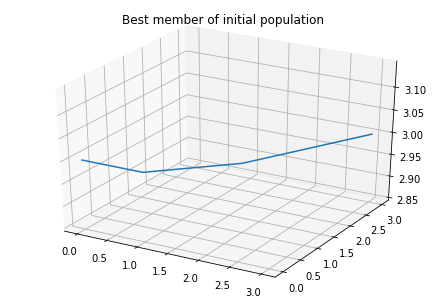

Cost Function max. value:  0.00335474333886304 

Distance to Target 298.0853970005679


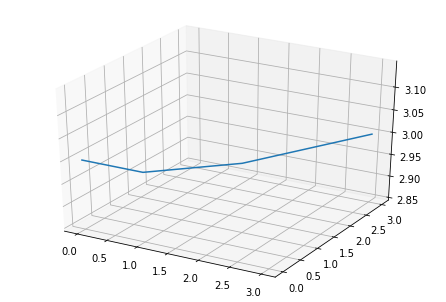

array([[[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
        [3, 3, 3, 3]],

       [[0, 1, 2, 3],
        [0, 0, 1, 3],
    

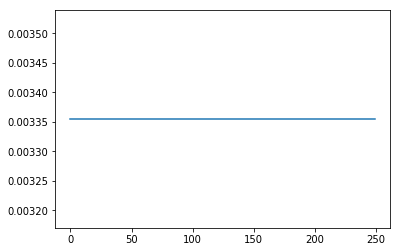

In [61]:
from diblogeo import Geo
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# Read excel with coordinates between two airports
def readFile(sheet_name, name='Points'):
    df = pd.read_excel(name+'.xlsx', 
                       index_col=0,
                       sheet_name=sheet_name)
    return df

# Generates a number of coordinates between a_point and b_point
def generateTrajectory(sheet_name, a_point, b_point, number, xlsx_name='Points'):
    df = readFile(sheet_name, xlsx_name)
    Point_A = df[df['Point'].str.contains(a_point)]
    Point_B = df[df['Point'].str.contains(b_point)]
#    print(df.loc[['VABER']])
    list_lat = np.linspace(Point_A['Lat'], Point_B['Lat'], num=number)
    list_lon = np.linspace(Point_A['Lon'], Point_B['Lon'], num=number)
    list_alt = np.linspace(Point_A['Height'], Point_B['Height'], num=number)
    return list_lat, list_lon, list_alt

# Generates a route consisting of coordX, coordY and coordZ points
def createRoute(start, finish, number):
    a = np.linspace(start, finish, num=number)
    b = np.linspace(start, finish, num=number)
    c = np.linspace(start, finish, num=number)
    X = np.random.choice(a, size=number, replace=True, p=None)
    Y = np.random.choice(b, size=number, replace=True, p=None)
    Z = np.random.choice(c, size=number, replace=True, p=None)
    # define X coordinates (algorithm goes trough each X point and selects Y with the best fit)
    X = np.linspace(start, finish, num=number)
#     Y = np.linspace(start, finish, num=number)
    Z = np.linspace(start, finish, num=number)
    # define start and finish points
    Y[start] = start
    Z[start] = finish
    Z[finish] = finish   
    X[start] = start
    Y[finish] = finish
    # Z profile between start and finish (in this case it is set to constant height line)
    Z = np.linspace(finish, finish, num=number)
    return (X,Y,Z)

def initialPopulation(popSize, start, finish, number, warm_start=False):
    if (warm_start==True):
        print("loading the output.npy file ")
        population_arr = np.load('outfile.npy')
    else:
        population = []
        for i in range(0, popSize):
            population.append(createRoute(start, finish, number))
            population_arr = np.asarray(population)
    return population_arr.astype(int)

def getCoordinates(arrays, number, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points'):
    lat, lon, alt = generateTrajectory(sheet_name=sheet_name, 
                                       a_point=a_point, 
                                       b_point=b_point, 
                                       number=number, 
                                       xlsx_name=xlsx_name)
    list_lat, list_lon, list_alt = [], [], []    
    # iterating through population members to get the real coordinate points
    for num in range (0, len(arrays)):
        for ide in range (0, len(arrays[0][0])):
#            print(arrays[num][1][ide])
            list_lat = np.append(list_lat, (lat[arrays[num][0][ide]]))
            list_lon = np.append(list_lon, (lon[arrays[num][1][ide]]))
            list_alt = np.append(list_alt, (alt[arrays[num][2][ide]]))
    # reshape(3,number) was not ok         
    list_lat = list_lat.reshape(len(arrays),len(arrays[0][0]))
    list_lon = list_lon.reshape(len(arrays),len(arrays[0][0]))
    list_alt = list_alt.reshape(len(arrays),len(arrays[0][0]))
    return list_lat, list_lon, list_alt



# calculate distance between points in a grid
def distanceCalculate(arrays, number, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points'):
    distance = []
#     lat, lon, alt = generateTrajectory(sheet_name = sheet_name, 
#                                        a_point=a_point, 
#                                        b_point=b_point, 
#                                        number=number, 
#                                        xlsx_name = xlsx_name)
#     list_lat, list_lon, list_alt = [], [], []    
#     # iterating through population members to get the real coordinate points
#     for num in range (0, len(arrays)):
#         for ide in range (0, len(arrays[0][0])):
# #            print(arrays[num][1][ide])
#             list_lat = np.append(list_lat, (lat[arrays[num][0][ide]]))
#             list_lon = np.append(list_lon, (lon[arrays[num][1][ide]]))
#             list_alt = np.append(list_alt, (alt[arrays[num][2][ide]]))
#     # reshape(3,number) was not ok         
#     list_lat = list_lat.reshape(len(arrays),len(arrays[0][0]))
#     list_lon = list_lon.reshape(len(arrays),len(arrays[0][0]))
#     list_alt = list_alt.reshape(len(arrays),len(arrays[0][0]))
    
    list_lat, list_lon, list_alt = getCoordinates(arrays=arrays,
                                                  sheet_name=sheet_name, 
                                                  a_point=a_point, 
                                                  b_point=b_point, 
                                                  number=number, 
                                                  xlsx_name=xlsx_name)
    # iterating through real coordinate points to get distance
    for num in range (0, len(arrays)):
        for ide in range (0, len(arrays[0][0])-1):
            distance = np.append(distance, Geo((list_lat[num][ide].tolist(), 
                                                list_lon[num][ide].tolist(), 
                                                list_alt[num][ide].tolist()*1000)).distance((list_lat[num][ide+1].tolist(), 
                                                                                             list_lon[num][ide+1].tolist(),
                                                                                             list_alt[num][ide+1].tolist()*1000)))
    # total distance between a_point and b_point through generated points 
    pre_dist = distance.reshape(len(arrays), len(arrays[0][0])-1)
    distance = np.sum(pre_dist, axis=1)
    return distance

def weatherSituation(arrays):
    weather = np.zeros((len(arrays[0][0]),len(arrays[0][0])), dtype=int)
#    weather = np.zeros((5,6), dtype=int)
#    weather = np.zeros((6,6), dtype=int)
    weather[2][2] = 1e6
#    weather[2][3] = 0
    return weather

def weatherCalculate(arrays):
    #define the weather situation (later replace with function input)
    weather = weatherSituation(arrays)
    weather_score = []
    for num in range (0, len(arrays)):
        weather2 = []
        for id in range(0,(len(arrays[0][0]))-1):
            weather3 = (weather[arrays[num][0][id].astype(int)][arrays[num][1][id].astype(int)])
            weather2 = np.append(weather2, weather3)
        weather_sum = np.sum(weather2)
        weather_score = np.append(weather_score, weather_sum)
    return weather_score

def fitnessScore(arrays, number, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points'):
    fitness = np.array([])
    distance = distanceCalculate(arrays=arrays, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
    fitness = 1/(distance+weatherCalculate(arrays))
#    print "fitness: ", fitness
    return fitness

import heapq
def Selection(arrays, number, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points'):
    sorted_arrays = np.sort(fitnessScore(arrays=arrays, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name))
    largestFitness = (sorted_arrays[-1], sorted_arrays[-2])
    if (largestFitness[0] == largestFitness[1]):
        largestindexes1 = np.where(fitnessScore(arrays=arrays, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name) == largestFitness[0])
        largestindexes2 = np.where(fitnessScore(arrays=arrays, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name) == largestFitness[1])
        largestindexes1 = np.array([largestindexes1[0][0]])
        largestindexes2 = np.array([largestindexes2[0][0]])
    else:
        largestindexes1 = np.where(fitnessScore(arrays=arrays, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name) == largestFitness[0])
        largestindexes2 = np.where(fitnessScore(arrays=arrays, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name) == largestFitness[1])
        largestindexes1 = np.array([largestindexes1[0][0]])
        largestindexes2 = np.array([largestindexes2[0][0]])
    population1 = (arrays[largestindexes1])
    population2 = (arrays[largestindexes2])
    return (largestindexes1, largestindexes2)

# Give two best arrays to Crossover(arrays) and make mutations, 
# then return childs and append to population if their 
# fitness score is better (larger)
def Crossover(array1, array2, number):
    rand = np.random.randint(1, array1[0][0].size-1)    
    # do crossover for X Y and Z, (inefective coppying..)
#    array1[0][0][1:rand], array2[0][0][1:rand] = array2[0][0][1:rand].copy(), array1[0][0][1:rand].copy()
    array1[0][1][1:rand], array2[0][1][1:rand] = array2[0][1][1:rand].copy(), array1[0][1][1:rand].copy()
#    array1[0][2][1:rand], array2[0][2][1:rand] = array2[0][2][1:rand].copy(), array1[0][2][1:rand].copy()
    
    # do mutation (inefective coppying..)    
    rand2 = np.random.randint(0, array1[0][0].size)
    rand3 = np.random.randint(0, array1[0][0].size) 
    rand4 = np.random.randint(0, number)
    rand5 = np.random.randint(0, number)
    rand6 = np.random.randint(0, number)
    rand7 = np.random.randint(0, number)
    rand8 = np.random.randint(0, number)
    rand9 = np.random.randint(0, number)
    if (rand2 < rand3):
 #       array1[0][0][rand2+1:rand3-1], array2[0][0][rand2+1:rand3-1] = rand4, rand5
        array1[0][1][rand2+1:rand3-1], array2[0][1][rand2+1:rand3-1] = rand6, rand7
#        array1[0][2][rand2+1:rand3-1], array2[0][2][rand2+1:rand3-1] = rand8, rand9
    else:
 #       array1[0][0][rand3+1:rand2-1], array2[0][0][rand3+1:rand2-1] = rand4, rand5
        array1[0][1][rand3+1:rand2-1], array2[0][1][rand3+1:rand2-1] = rand6, rand7
#        array1[0][2][rand3+1:rand2-1], array2[0][2][rand3+1:rand2-1] = rand8, rand9
    crossover = (array1, array2)
    
    return np.squeeze(crossover)

# Genetic algorithm (later for -> while and move to function with some stop condition)
def geneticAlgorithm(population, counts, number, save_output=True, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points'):
    index=[]
    score=[]
    for i in range(0, counts):
        bestmembers = Selection(population, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
        child = Crossover(population[bestmembers[0]], population[bestmembers[1]], number)        
                
        fitnessScoreChild = fitnessScore(child, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
        fitnessScorePopulation = fitnessScore(population, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
 
        index.append(i)
        score.append(max(fitnessScore(population, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)))
        
        index_worst_pop = np.argmin(fitnessScorePopulation)
        index_best_fit = np.argmax(fitnessScoreChild)
          
        if (fitnessScoreChild[index_best_fit] > fitnessScorePopulation[index_worst_pop]):
            population = np.delete(population, index_worst_pop, axis=0)
            population = np.concatenate((population, [child[index_best_fit]]), axis=0)
        else:
            continue
    if (save_output==True):
        print ("saving the output to output.npy file")
        if (saveOutput(population)==True):
            print("output.npy file saved")
    return population, index, score

# Saves output as numpy array
def saveOutput(array):
    np.save('outfile.npy', array)
    return True

def plottingResults(initPop, population, index, score, number, sheet_name, a_point, b_point, xlsx_name):
    initPopfitnessScore = fitnessScore(initPop, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
    PopfitnessScore = fitnessScore(population, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
    print ("init Pop Cost Function max. value: ", np.max(initPopfitnessScore), "\n")
    print ("init Pop Distance to Target", 1/np.max(initPopfitnessScore))
    fig = pyplot.figure()
    ax = Axes3D(fig)
    plt.title("Best member of initial population")
    ax.plot(initPop[np.argmax(initPopfitnessScore)][0], 
            initPop[np.argmax(initPopfitnessScore)][1], 
            initPop[np.argmax(initPopfitnessScore)][2])
    pyplot.show()

    print ("Cost Function max. value: ", np.max(PopfitnessScore), "\n")
    print ("Distance to Target", 1/np.max(PopfitnessScore))

    fig = pyplot.figure()
    ax1 = Axes3D(fig)

    ax1.plot(population[np.argmax(PopfitnessScore)][0], 
             population[np.argmax(PopfitnessScore)][1], 
             population[np.argmax(PopfitnessScore)][2])
    pyplot.show()
    
    plt.plot(index, score)
    
    return True

def programRoutines(start=0, finish=3, number=4, initPopSize=25, counts=250, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points'):
#lat, lon, alt = generateTrajectory(sheet_name ='WAW-VNO', a_point='EPWA', b_point='VABER', number=5, xlsx_name ='Points')
    initPop = initialPopulation(popSize=initPopSize, start=start, finish=finish, number=number, warm_start=True)
    population, index, score = geneticAlgorithm(initPop, number=number, counts=counts, save_output=True, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
    plottingResults(initPop, population, index, score, number=number, sheet_name=sheet_name, a_point=a_point, b_point=b_point, xlsx_name=xlsx_name)
    return population

programRoutines(start=0, finish=3, number=4, initPopSize=25, counts=250, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', xlsx_name='Points')

# get the best population member
# get coordinate points of the best population member
# add points to the excel sheet
# calculate distance over all trajectory
# read aircraft parameters from excel file
# read excel sheet with schedule
# calculate ETA based on aircraft speed and distance
# generate excel sheet with the results
# plot a trajectory path on the map with points and etc.


In [2]:
# calculate distance between points in a grid
def distanceCalculate(arrays, sheet_name='WAW-VNO', a_point='EPWA', b_point='VABER', number=6, xlsx_name='Points'):
    print ("request: \n")
    distance = []
    lat, lon, alt = generateTrajectory(sheet_name = sheet_name, 
                                       a_point=a_point, 
                                       b_point=b_point, 
                                       number=number, 
                                       xlsx_name = xlsx_name)
    list_lat, list_lon, list_alt = [], [], []    
    # iterating through population members to get the real coordinate points
    for num in range (0, len(arrays)):
        for ide in range (0, len(arrays[0][0])):
#            print(arrays[num][1][ide])
            list_lat = np.append(list_lat, (lat[arrays[num][0][ide]]))
            list_lon = np.append(list_lon, (lon[arrays[num][1][ide]]))
            list_alt = np.append(list_alt, (alt[arrays[num][2][ide]]))
    # reshape(3,number) was not ok         
    list_lat = list_lat.reshape(len(arrays),number)
    list_lon = list_lon.reshape(len(arrays),number)
    list_alt = list_alt.reshape(len(arrays),number)
    # iterating through real coordinate points to get distance
    for num in range (0, len(arrays)):
        for ide in range (0, len(arrays[0][0])-1):
            distance = np.append(distance, Geo((list_lat[num][ide].tolist(), 
                                                list_lon[num][ide].tolist(), 
                                                list_alt[num][ide].tolist()*1000)).distance((list_lat[num][ide+1].tolist(), 
                                                                                             list_lon[num][ide+1].tolist(),
                                                                                             list_alt[num][ide+1].tolist()*1000)))
    # total distance between a_point and b_point through generated points 
    pre_dist = distance.reshape(len(arrays), number-1)
    print(pre_dist)
    distance = np.sum(pre_dist,axis=1)
    return distance

initPop = initialPopulation(popSize=3, start=0, finish=5, number=6, warm_start=False)

dinit = distanceCalculate(initPop)
dpop = distanceCalculate(population)
print(dinit)
print(dpop)

NameError: name 'initialPopulation' is not defined

In [ ]:
list_one = population[np.argmax(fitnessScore(population))]

lat = np.linspace(52.165570, 54.636965, num=number)
lon = np.linspace(20.967179, 25.287749, num=number)
alt = np.linspace(1, 2, num=number)

list_two = np.array([lat, lon, alt])

listas = []
for id in range(0,3):
    listas = np.append(listas, list_two[id][list_one.astype(int)[id]])
                              
listas = listas.reshape(3,number)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.gcf()
fig.set_size_inches(12, 12)
ax1 = fig.add_subplot(111)

waw_lat = 52.165570; 
waw_lon = 20.967179;

vno_lat = 54.636965; 
vno_lon = 25.287749;

vaber_lat = 54.193086;
vaber_lon = 23.412817;

#lons = [waw_lon, vaber_lon, vno_lon]
#lats = [waw_lat, vaber_lat, vno_lat]
lats = listas[0]
lons = listas[1]

m = Basemap(llcrnrlon=waw_lon-1.,llcrnrlat=waw_lat-1,urcrnrlon=vno_lon+3,urcrnrlat=vno_lat+2,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',projection='merc',\
            lat_0=52.,lon_0=25.,lat_ts=27)

m.drawcoastlines(color='white', linewidth=0.3)  # add coastlines
m.fillcontinents(lake_color='aqua')
m.drawcountries()
#m.drawrivers(color='blue')
m.drawlsmask(ocean_color='blue')

# draw parallels
m.drawparallels(np.arange(10,90,0.2),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,0.2),labels=[1,1,0,1])



latitude = list_two[0]
longtitude = list_two[1]

y_lat = []
x_lon = []
#print  np.where(weatherSituation() == 100)[0], np.where( weatherSituation() == 100)[1]
for idx, idy in zip(np.where(weatherSituation() == 10)[0], np.where(weatherSituation() == 10)[1]):
    y_lat = np.append(y_lat,latitude[idx])
    x_lon = np.append(x_lon,longtitude[idy])
#print x_lon, y_lat   
x2, y2 = m(x_lon, y_lat)
ax1.plot(x2, y2, 10, color='blue', linestyle='None', marker='s', markersize=15) 

x, y = m(lons, lats)  # transform coordinates

ax1.plot(x, y, 10, color='Red') 

# plot points with text
# text = ['WAW', 'VABER', 'VNO']

# plotting weather
#np.where( weatherSituation() == 100)


#plt.text(x[0],y[0],text[0],fontsize=7, fontweight='bold',
#                     ha='right',va='center',color='k')
# plt.text(x[1],y[1],text[1],fontsize=7, fontweight='bold',
#                     ha='left',va='center',color='k')
# plt.text(x[2],y[2],text[2],fontsize=7, fontweight='bold',
#                     ha='left',va='center',color='k')
plt.show()

In [ ]:
#!/usr/bin/python

import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.interpolate import spline

# Local variables
x = []
y = []

# Open the data file for reading lines
datafile = open('testdata1.txt', 'r')
sepfile = datafile.read().split('\n')
datafile.close()

# Create a canvas to place the subgraphs
canvas = plt.figure()
rect = canvas.patch
rect.set_facecolor('white')

# Iterate through the lines and parse them
for datapair in sepfile:
    if datapair:
        xypair = datapair.split(' ')
        x.append(int(xypair[1]))
        y.append(int(xypair[3]))

x_sm = np.array(x)
y_sm = np.array(y)

x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)
y_smooth = spline(x, y, x_smooth)

# Define the matrix of 1x1 to place subplots
# Placing the plot1 on 1x1 matrix, at pos 1
sp1 = canvas.add_subplot(1,1,1, axisbg='w')
#sp1.plot(x, y, 'red', linewidth=2)
sp1.plot(x_smooth, y_smooth, 'red', linewidth=1)

# Colorcode the tick tabs 
sp1.tick_params(axis='x', colors='red')
sp1.tick_params(axis='y', colors='red')

# Colorcode the spine of the graph
sp1.spines['bottom'].set_color('r')
sp1.spines['top'].set_color('r')
sp1.spines['left'].set_color('r')
sp1.spines['right'].set_color('r')

# Put the title and labels
sp1.set_title('matplotlib example 1', color='red')
sp1.set_xlabel('matplot x label', color='red')
sp1.set_ylabel('matplot y label', color='red')

# Show the plot/image
plt.tight_layout()
plt.grid(alpha=0.8)
plt.savefig("example6.eps")
plt.show()

In [ ]:
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap

waw_lat = 52.165570; 
waw_lon = 20.967179;

vno_lat = 54.636965; 
vno_lon = 25.287749;

vaber_lat = 54.193086;
vaber_lon = 23.412817;

#lons = [waw_lon, vaber_lon, vno_lon]
#lats = [waw_lat, vaber_lat, vno_lat]

lats = listas[0]
lons = listas[1]

m = Basemap(llcrnrlon=waw_lon-1.,llcrnrlat=waw_lat-1,urcrnrlon=vno_lon+3,urcrnrlat=vno_lat+2,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=52.,lon_0=25.,lat_ts=27)

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = Axes3D(fig)

'''
ax.azim = 270
ax.elev = 90
ax.dist = 5
'''

ax.add_collection3d(m.drawcoastlines(color='black', linewidth=0.3))
#ax.add_collection3d(m.fillcontinents(lake_color='aqua'))
ax.add_collection3d(m.drawcountries())
#ax.add_collection3d(m.drawlsmask(ocean_color='blue'))
#ax.add_collection3d(m.drawparallels(np.arange(10,90,1),labels=[1,1,0,1]))
#ax.add_collection3d(m.drawmeridians(np.arange(-180,180,1),labels=[1,1,0,1]))
x, y = m(lons, lats)  # transform coordinates
text = ['WAW', 'VABER', 'VNO']
ax.scatter(x, y, 10, marker='o', color='Red')

cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = m(lons, lats)
ax.plot(x, y, 0.1, 10, marker='o', color='Red') 
              
plt.show()

In [ ]:
# A* Shortest Path Algorithm
# http://en.wikipedia.org/wiki/A*
# FB - 201012256
from heapq import heappush, heappop # for priority queue
import math
import time
import random

class node:
    xPos = 0 # x position
    yPos = 0 # y position
    distance = 0 # total distance already travelled to reach the node
    priority = 0 # priority = distance + remaining distance estimate
    def __init__(self, xPos, yPos, distance, priority):
        self.xPos = xPos
        self.yPos = yPos
        self.distance = distance
        self.priority = priority
    def __lt__(self, other): # comparison method for priority queue
        return self.priority < other.priority
    def updatePriority(self, xDest, yDest):
        self.priority = self.distance + self.estimate(xDest, yDest) * 10 # A*
    # give higher priority to going straight instead of diagonally
    def nextMove(self, dirs, d): # d: direction to move
        if dirs == 8 and d % 2 != 0:
            self.distance += 14
        else:
            self.distance += 10
    # Estimation function for the remaining distance to the goal.
    def estimate(self, xDest, yDest):
        xd = xDest - self.xPos
        yd = yDest - self.yPos
        # Euclidian Distance
        d = math.sqrt(xd * xd + yd * yd)
        # Manhattan distance
        # d = abs(xd) + abs(yd)
        # Chebyshev distance
        # d = max(abs(xd), abs(yd))
        return(d)

# A-star algorithm.
# The path returned will be a string of digits of directions.
def pathFind(the_map, n, m, dirs, dx, dy, xA, yA, xB, yB):
    closed_nodes_map = [] # map of closed (tried-out) nodes
    open_nodes_map = [] # map of open (not-yet-tried) nodes
    dir_map = [] # map of dirs
    row = [0] * n
    for i in range(m): # create 2d arrays
        closed_nodes_map.append(list(row))
        open_nodes_map.append(list(row))
        dir_map.append(list(row))

    pq = [[], []] # priority queues of open (not-yet-tried) nodes
    pqi = 0 # priority queue index
    # create the start node and push into list of open nodes
    n0 = node(xA, yA, 0, 0)
    n0.updatePriority(xB, yB)
    heappush(pq[pqi], n0)
    open_nodes_map[yA][xA] = n0.priority # mark it on the open nodes map

    # A* search
    while len(pq[pqi]) > 0:
        # get the current node w/ the highest priority
        # from the list of open nodes
        n1 = pq[pqi][0] # top node
        n0 = node(n1.xPos, n1.yPos, n1.distance, n1.priority)
        x = n0.xPos
        y = n0.yPos
        heappop(pq[pqi]) # remove the node from the open list
        open_nodes_map[y][x] = 0
        closed_nodes_map[y][x] = 1 # mark it on the closed nodes map

        # quit searching when the goal is reached
        # if n0.estimate(xB, yB) == 0:
        if x == xB and y == yB:
            # generate the path from finish to start
            # by following the dirs
            path = ''
            while not (x == xA and y == yA):
                j = dir_map[y][x]
                c = str((j + dirs / 2) % dirs)
                path = c + path
                x += dx[j]
                y += dy[j]
            return path

        # generate moves (child nodes) in all possible dirs
        for i in range(dirs):
            xdx = x + dx[i]
            ydy = y + dy[i]
            if not (xdx < 0 or xdx > n-1 or ydy < 0 or ydy > m - 1
                    or the_map[ydy][xdx] == 1 or closed_nodes_map[ydy][xdx] == 1):
                # generate a child node
                m0 = node(xdx, ydy, n0.distance, n0.priority)
                m0.nextMove(dirs, i)
                m0.updatePriority(xB, yB)
                # if it is not in the open list then add into that
                if open_nodes_map[ydy][xdx] == 0:
                    open_nodes_map[ydy][xdx] = m0.priority
                    heappush(pq[pqi], m0)
                    # mark its parent node direction
                    dir_map[ydy][xdx] = (i + dirs / 2) % dirs
                elif open_nodes_map[ydy][xdx] > m0.priority:
                    # update the priority
                    open_nodes_map[ydy][xdx] = m0.priority
                    # update the parent direction
                    dir_map[ydy][xdx] = (i + dirs / 2) % dirs
                    # replace the node
                    # by emptying one pq to the other one
                    # except the node to be replaced will be ignored
                    # and the new node will be pushed in instead
                    while not (pq[pqi][0].xPos == xdx and pq[pqi][0].yPos == ydy):
                        heappush(pq[1 - pqi], pq[pqi][0])
                        heappop(pq[pqi])
                    heappop(pq[pqi]) # remove the target node
                    # empty the larger size priority queue to the smaller one
                    if len(pq[pqi]) > len(pq[1 - pqi]):
                        pqi = 1 - pqi
                    while len(pq[pqi]) > 0:
                        heappush(pq[1-pqi], pq[pqi][0])
                        heappop(pq[pqi])       
                    pqi = 1 - pqi
                    heappush(pq[pqi], m0) # add the better node instead
    return '' # if no route found

# MAIN
dirs = 8 # number of possible directions to move on the map
if dirs == 4:
    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
elif dirs == 8:
    dx = [1, 1, 0, -1, -1, -1, 0, 1]
    dy = [0, 1, 1, 1, 0, -1, -1, -1]

n = 30 # horizontal size of the map
m = 30 # vertical size of the map
the_map = []
row = [0] * n
for i in range(m): # create empty map
    the_map.append(list(row))

# fillout the map with a '+' pattern
for x in range(n / 8, n * 7 / 8):
    the_map[m / 2][x] = 1
for y in range(m/8, m * 7 / 8):
    the_map[y][n / 2] = 1

# randomly select start and finish locations from a list
sf = []
sf.append((0, 0, n - 1, m - 1))
sf.append((0, m - 1, n - 1, 0))
sf.append((n / 2 - 1, m / 2 - 1, n / 2 + 1, m / 2 + 1))
sf.append((n / 2 - 1, m / 2 + 1, n / 2 + 1, m / 2 - 1))
sf.append((n / 2 - 1, 0, n / 2 + 1, m - 1))
sf.append((n / 2 + 1, m - 1, n / 2 - 1, 0))
sf.append((0, m / 2 - 1, n - 1, m / 2 + 1))
sf.append((n - 1, m / 2 + 1, 0, m / 2 - 1))
(xA, yA, xB, yB) = random.choice(sf)

print 'Map size (X,Y): ', n, m
print 'Start: ', xA, yA
print 'Finish: ', xB, yB
t = time.time()
route = pathFind(the_map, n, m, dirs, dx, dy, xA, yA, xB, yB)
print 'Time to generate the route (seconds): ', time.time() - t
print 'Route:'
print route

# mark the route on the map
if len(route) > 0:
    x = xA
    y = yA
    the_map[y][x] = 2
    for i in range(len(route)):
        j = int(route[i])
        x += dx[j]
        y += dy[j]
        the_map[y][x] = 3
    the_map[y][x] = 4

# display the map with the route added
print 'Map:'
for y in range(m):
    for x in range(n):
        xy = the_map[y][x]
        if xy == 0:
            print '.', # space
        elif xy == 1:
            print 'O', # obstacle
        elif xy == 2:
            print 'S', # start
        elif xy == 3:
            print 'R', # route
        elif xy == 4:
            print 'F', # finish
    print



In [ ]:
%pylab inline

def muller_potential(x, y, use_numpy=False):
    """Muller potential
    Parameters
    ----------
    x : {float, np.ndarray, or theano symbolic variable}
    X coordinate. If you supply an array, x and y need to be the same shape,
    and the potential will be calculated at each (x,y pair)
    y : {float, np.ndarray, or theano symbolic variable}
    Y coordinate. If you supply an array, x and y need to be the same shape,
    and the potential will be calculated at each (x,y pair)
    Returns
    -------
    potential : {float, np.ndarray, or theano symbolic variable}
    Potential energy. Will be the same shape as the inputs, x and y.
    Reference
    ---------
    Code adapted from https://cims.nyu.edu/~eve2/ztsMueller.m
    """
    aa = [-1, -5, -6.5, 0.7]
    bb = [0, 0, 11, 0.6]
    cc = [-10, -10, -6.5, 0.7]
    AA = [-200, -10, -170, 15]
    XX = [1, 0, -0.1, -1]
    YY = [0, 0.5, 1.5, 1]
    # use symbolic algebra if you supply symbolic quantities
    exp = np.exp
    value = 0
    for j in range(0, 4):
        if use_numpy:
            value += AA[j] * numpy.exp(aa[j] * (x - XX[j])**2 + bb[j] * (x - XX[j]) * (y - YY[j]) + cc[j] * (y - YY[j])**2)
        else: # use sympy
            value += AA[j] * sympy.exp(aa[j] * (x - XX[j])**2 + bb[j] * (x - XX[j]) * (y - YY[j]) + cc[j] * (y - YY[j])**2)
    return value

minx=-1.5
maxx=1.2
miny=-0.2
maxy=2
ax=None
grid_width = max(maxx-minx, maxy-miny) / 50.0
xx, yy = np.mgrid[minx : maxx : grid_width, miny : maxy : grid_width]
V = muller_potential(xx, yy, use_numpy=True)*0
V = ma.masked_array(V, V>200)
contourf(V, 40)
tmp = colorbar()

def dijkstra(V):
    mask = V.mask
    visit_mask = mask.copy() # mask visited cells
    m = numpy.ones_like(V) * numpy.inf
    connectivity = [(i,j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (not (i == j == 0))]
    cc = unravel_index(V.argmin(), m.shape) # current_cell
    m[cc] = 0
    P = {}  # dictionary of predecessors 
    #while (~visit_mask).sum() > 0:
    for _ in range(V.size):
        #print cc
        neighbors = [tuple(e) for e in asarray(cc) - connectivity 
                     if e[0] > 0 and e[1] > 0 and e[0] < V.shape[0] and e[1] < V.shape[1]]
        neighbors = [ e for e in neighbors if not visit_mask[e] ]
        tentative_distance = asarray([V[e]-V[cc] for e in neighbors])
        for i,e in enumerate(neighbors):
            d = tentative_distance[i] + m[cc]
            if d < m[e]:
                m[e] = d
                P[e] = cc
        visit_mask[cc] = True
        m_mask = ma.masked_array(m, visit_mask)
        cc = unravel_index(m_mask.argmin(), m.shape)
    return m, P

def shortestPath(start, end, P):
    Path = []
    step = end
    while 1:
        Path.append(step)
        if step == start: break
        step = P[step]
    Path.reverse()
    return asarray(Path)

D, P = dijkstra(V)
path = shortestPath((0,0), (30,2), P)

contourf(V, 40)
plot(path[:,1], path[:,0], 'r.-')

path

In [ ]:
x = np.linspace(0, 22, num=23)
x